# AIT Development notebook


## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|3|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit(second cell, you set use modules.)|
| 4|import|2|you should write use import modules.<br>but bottom lines do not edit.|should edit(first cell, you import your moduel.)|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

## notebook template revision history

### 1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

### 1.0.0 2020/10/12

* new cerarion

In [ ]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from glob import glob
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

In [3]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

In [4]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.2.3')
    requirements_generator.add_package('numpy', '2.0.2')
    requirements_generator.add_package('scikit-learn','1.6.1')
    requirements_generator.add_package('matplotlib', '3.10.1')
    requirements_generator.add_package('tensorflow', '2.18.1')
    requirements_generator.add_package('tensorflow-cpu', '2.18.1')

In [5]:
#########################################
# area:create requirements and pip install
# do not edit
#########################################
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.24-py3-none-any.whl (from -r /workdir/root/develop/requirements.txt (line 7))
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tensorflow-2.18.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorflow_cpu-2.18.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.wh

In [6]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import six
import gzip
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from os import path
from pathlib import Path

from six.moves import urllib
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity

2025-04-16 14:50:49.506199: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-16 14:50:49.513288: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 14:50:49.623443: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 14:50:49.757027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744782649.844639      55 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744782649.87

In [7]:
#########################################
# area:import
# do not edit
#########################################

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [8]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_dataset_image_diversity_vae')
    manifest_genenerator.set_ait_description('学習用画像データの特徴を学習させたVAEモデルで評価用学習データの特徴量を算出する\nその特徴量の差が0に近いほど、評価用画像データが学習用データの特徴を網羅できていると評価できる')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_dataset_image_diversity_vae')
    manifest_genenerator.set_ait_version('0.8')
    manifest_genenerator.add_ait_keywords('images')
    manifest_genenerator.add_ait_keywords('Variational Auto-Encoder')
    manifest_genenerator.add_ait_keywords('VAE')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-1データセットの被覆性')
    inventory_requirement_train_images = manifest_genenerator.format_ait_inventory_requirement(format_=['gz'])
    manifest_genenerator.add_ait_inventories(name='train_images',
                                             type_='dataset',
                                             description='学習用画像データ\nデータ数60000、ピクセル数28*28分のモノクロ画像が格納されたバイナリファイル。これをgz圧縮されたもの\nMNISTと同じ保存形式',
                                             requirement=inventory_requirement_train_images)
    inventory_requirement_train_labels = manifest_genenerator.format_ait_inventory_requirement(format_=['gz'])
    manifest_genenerator.add_ait_inventories(name='train_labels',
                                             type_='dataset',
                                             description='学習用画像データのラベル\nデータ数60000のラベル（数値）が格納されたバイナリファイル。これをgz圧縮されたもの\nMNISTと同じ保存形式',
                                             requirement=inventory_requirement_train_labels)
    inventory_requirement_comparison_data = manifest_genenerator.format_ait_inventory_requirement(format_=['gz'])
    manifest_genenerator.add_ait_inventories(name='comparison_data',
                                             type_='dataset',
                                             description='学習用画像データとラベル',
                                             requirement=inventory_requirement_comparison_data)
    manifest_genenerator.add_ait_parameters(name='similarity_function',
                                            type_='str',
                                            description='特徴量を測る距離の算出方式\neuclidean_distance,manhattan_distance,cosine_similarity',
                                            default_val='cosine_similarity')
    manifest_genenerator.add_ait_parameters(name='epochs',
                                            type_='int',
                                            description='VAEモデルの学習パラメータ:学習の試行回数',
                                            default_val='10')
    manifest_genenerator.add_ait_parameters(name='batch_size',
                                            type_='int',
                                            description='VAEモデルの学習パラメータ:学習のバッチサイズ',
                                            default_val='128')
    manifest_genenerator.add_ait_measures(name='similarity', 
                                          type_='float', 
                                          description='特徴量差\neuclidean distance considered < 1, manhattan distance considered < 1, cosine similarity considered < 0.2', 
                                          structure='sequence',
                                          min='0')
    manifest_genenerator.add_ait_resources(name='plot_label_clusters', 
                                           type_='picture', 
                                           description='ラベルごとの類似度をクラスタで表現')
    manifest_genenerator.add_ait_resources(name='plot_label_similarity', 
                                           type_='picture', 
                                           description='ラベルごとの類似度平均をグラフ描画')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_genenerator.add_ait_references(bib_info='Auto-Encoding Variational Bayes',url='https://doi.org/10.48550/arXiv.1312.6114')
    manifest_path = manifest_genenerator.write()

In [9]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='train_images',
                                        value='data/train-images-idx3-ubyte.gz')
    input_generator.add_ait_inventories(name='train_labels',
                                        value='data/train-labels-idx1-ubyte.gz')
    input_generator.add_ait_inventories(name='comparison_data',
                                        value='data/mnist_30changed.gz')
    input_generator.set_ait_params(name='similarity_function',
                                   value='cosine_similarity')
    input_generator.set_ait_params(name='epochs',
                                   value='10')
    input_generator.set_ait_params(name='batch_size',
                                   value='128')
    input_generator.write()

In [10]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [11]:
# Create a sampling layer

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [12]:
#########################################
# area:functions
# should edit
#########################################

# Load data
@log(logger)
def load_data(images, labels, num=60000, dim=784):
    print('loading num{} dim{}...'.format(num, dim), images, labels, sep='\n')
    if not path.exists(images):
        raise Exception("ERROR: file not found. ({})".format(images))
    if not path.exists(labels):
        raise Exception("ERROR: file not found. ({})".format(labels))
        
    data = np.zeros(num * dim, dtype=np.uint8).reshape((num, dim))
    target = np.zeros(num, dtype=np.uint8).reshape((num, ))
    with gzip.open(images, 'rb') as f_images,\
            gzip.open(labels, 'rb') as f_labels:
        f_images.read(16)
        f_labels.read(8)
        for i in six.moves.range(num):
            target[i] = ord(f_labels.read(1))
            for j in six.moves.range(dim):
                data[i, j] = ord(f_images.read(1))
    data = data.reshape(num, 28, 28).astype(np.float32) / 255
    target = target.reshape(num, ).astype(np.int32)
    return data, target

In [13]:
#########################################
# area:functions
# should edit
#########################################

# Build the encoder
@log(logger)
def build_encoder(latent_dim=2):
    encoder_inputs = keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
    x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    encoder.summary()
    return encoder

In [14]:
#########################################
# area:functions
# should edit
#########################################

# Build the decoder
@log(logger)
def build_decoder(latent_dim=2):
    latent_inputs = keras.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
    x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
    decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
    decoder.summary()
    return decoder

In [15]:
# Define the VAE as a Model with a custom train_step

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [16]:
#########################################
# area:functions
# should edit
#########################################

# Train the VAE
@log(logger)
def train_vae(x_train, encoder, decoder, epochs=30, batch_size=128):
    x_train = np.expand_dims(x_train, -1)
    vae = VAE(encoder, decoder)
    vae.compile(optimizer=keras.optimizers.Adam())
    vae.fit(x_train, epochs=epochs, batch_size=batch_size)
    return vae

In [17]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
def get_mean(z_mean, labels, num):
    idx = labels==num
    return np.mean(z_mean[idx], axis=0)

In [18]:
#########################################
# area:functions
# should edit
#########################################

# Display how the latent space clusters different digit classes
@log(logger)
@resources(ait_output, path_helper, 'plot_label_clusters', 'plot_label_clusters.png')
def plot_label_clusters(vae, data, labels, sample_ratio=0.3, file_path: str=None) -> str:
    # display a 2D plot of the digit classes in the latent space
    _, data, _, labels = train_test_split(data, labels, test_size=sample_ratio, random_state=100)
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(10, 8))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap="rainbow", alpha=0.6)
    for i in range(10):
        m = get_mean(z_mean, labels, i)
        plt.text(m[0], m[1], "{}".format(i), fontsize=20)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    # save as png
    plt.savefig(file_path)

In [19]:
#########################################
# area:functions
# should edit
#########################################

# load comparison data
@log(logger)
def load_comparison_data(comparison_data):
    print('loading...', comparison_data, sep='\n')
    if not path.exists(comparison_data):
        raise Exception("ERROR: file not found. ({})".format(comparison_data))
        
    with open(comparison_data, 'rb') as f:
        return joblib.load(f)

In [20]:
#########################################
# area:functions
# should edit
#########################################

# distances, similarity
@log(logger)
def sim_cal(x_1, x_2, y_1, y_2, function, sample_ratio=0.3):
    _, x_1, _, y_1 = train_test_split(x_1, y_1, test_size=sample_ratio, random_state=100)
    _, x_2, _, y_2 = train_test_split(x_2, y_2, test_size=sample_ratio, random_state=100)
    x_1, x_2 = x_1.reshape(-1, 28 * 28), x_2.reshape(-1, 28 * 28)
    sim = []
    for i in range(10):
        idx_1 = y_1==i
        idx_2 = y_2==i
        if function == 'euclidean_distance':
            sim.append(euclidean_distances(x_1[idx_1], x_2[idx_2]))
        if function == 'manhattan_distance':
            sim.append(manhattan_distances(x_1[idx_1], x_2[idx_2]))
        if function == 'cosine_similarity':
            sim.append(abs(cosine_similarity(x_1[idx_1], x_2[idx_2])))
    return sim

In [21]:
#########################################
# area:functions
# should edit
#########################################

# distances, similarity after encode
@log(logger)
def sim_cal_enc(vae, x_1, x_2, y_1, y_2, function, sample_ratio=0.3):
    _, x_1, _, y_1 = train_test_split(x_1, y_1, test_size=sample_ratio, random_state=100)
    _, x_2, _, y_2 = train_test_split(x_2, y_2, test_size=sample_ratio, random_state=100)
    x_1, x_2 = x_1.reshape(-1, 28, 28), x_2.reshape(-1, 28, 28)
    sim = []
    for i in range(10):
        idx_1 = y_1==i
        idx_2 = y_2==i
        # vae encode decode
        _, _, z_1 = vae.encoder.predict(x_1[idx_1])
        _, _, z_2 = vae.encoder.predict(x_2[idx_2])
        if function == 'euclidean_distance':
            sim.append(euclidean_distances(z_1, z_2))
        if function == 'manhattan_distance':
            sim.append(manhattan_distances(z_1, z_2))
        if function == 'cosine_similarity':
            sim.append(abs(cosine_similarity(z_1, z_2)))
    return sim

In [22]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
def plt_bar(ax, sim_0, sim_1, date_name, method_name):
    sim_means_0, sim_means_1 = [], []
    for sim in sim_0:
        sim_means_0.append(np.mean(sim))
    for sim in sim_1:
        sim_means_1.append(np.mean(sim))

    x = np.arange(len(sim_0))
    width = 0.4
    rect0 = ax.bar(x - width * 0.5, sim_means_0, width, label='original data')
    rect1 = ax.bar(x + width * 0.5, sim_means_1, width, label='comparison_data')

    ax.set_ylabel('mean ' + method_name)
    ax.set_title('mean ' + method_name + ' of each label')
    ax.set_xlabel(date_name)
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.legend()

In [23]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'plot_label_similarity', 'plot_label_similarity.png')
def plot_label_similarity(sim_00, sim_01, sim_10, sim_11, function, file_path: str=None) -> str:
    _, ax = plt.subplots(1, 2, figsize=(12,4))
    plt_bar(ax[0], sim_00, sim_01, 'basic data', function)
    plt_bar(ax[1], sim_10, sim_11, 'encode data', function)
    # save as png
    plt.savefig(file_path)

In [24]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'similarity', is_many=True)
def calc_similarity(sim_10, sim_11):
    sim_means_0, sim_means_1 = [], []
    for sim in sim_10:
        sim_means_0.append(np.mean(sim))
    for sim in sim_11:
        sim_means_1.append(np.mean(sim))
    return abs(np.array(sim_means_1) - np.array(sim_means_0))

In [25]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [26]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:

    # load inventory
    train_images = ait_input.get_inventory_path('train_images')
    train_labels = ait_input.get_inventory_path('train_labels')
    x_train, y_train = load_data(train_images, train_labels)
    
    # load comparison data
    comparison_data = ait_input.get_inventory_path('comparison_data')
    x_compar, y_compar = load_comparison_data(comparison_data)
    
    # Build the encoder (default latent_dim=2)
    encoder = build_encoder()

    # Build the decoder (default latent_dim=2)
    decoder = build_decoder()
    
    # Train the VAE
    epochs = ait_input.get_method_param_value('epochs')
    batch_size = ait_input.get_method_param_value('batch_size')
    vae = train_vae(x_train, encoder, decoder, epochs=epochs, batch_size=batch_size)
    
    # resources plot_label_clusters
    plot_label_clusters(vae, x_train, y_train)
    
    # load similarity_function
    similarity_function = ait_input.get_method_param_value('similarity_function')

    # basic data sim_cal
    sim_00 = sim_cal(x_train, x_train, y_train, y_train, similarity_function)
    sim_01 = sim_cal(x_train, x_compar, y_train, y_compar, similarity_function)

    # encode data sim_cal
    sim_10 = sim_cal_enc(vae, x_train, x_train, y_train, y_train, similarity_function)
    sim_11 = sim_cal_enc(vae, x_train, x_compar, y_train, y_compar, similarity_function)

    # measures similarity
    calc_similarity(sim_10, sim_11)

    # resources plot_label_similarity
    plot_label_similarity(sim_00, sim_01, sim_10, sim_11, similarity_function)

    # AITLog
    move_log()

loading num60000 dim784...
/usr/local/qai/inventory/data/train-images-idx3-ubyte.gz
/usr/local/qai/inventory/data/train-labels-idx1-ubyte.gz
loading...
/usr/local/qai/inventory/data/mnist_30changed.gz


2025-04-16 14:51:05.763924: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │     50,192 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - kl_loss: 0.8542 - loss: 272.2402 - reconstruction_loss: 271.3860
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 3.6388 - loss: 191.5087 - reconstruction_loss: 187.8699
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 5.4774 - loss: 172.2496 - reconstruction_loss: 166.7722
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 5.7689 - loss: 167.8950 - reconstruction_loss: 162.1261
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 6.0132 - loss: 164.3997 - reconstruction_loss: 158.3864
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 6.1846 - loss: 162.5606 - reconstruction_loss: 156.3760
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 6.2644 - loss: 161.3258 - reconstruction_loss: 155.0615
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - kl_loss: 6.2782 - loss: 160.3407 - reconstruction_loss: 154.0625
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━

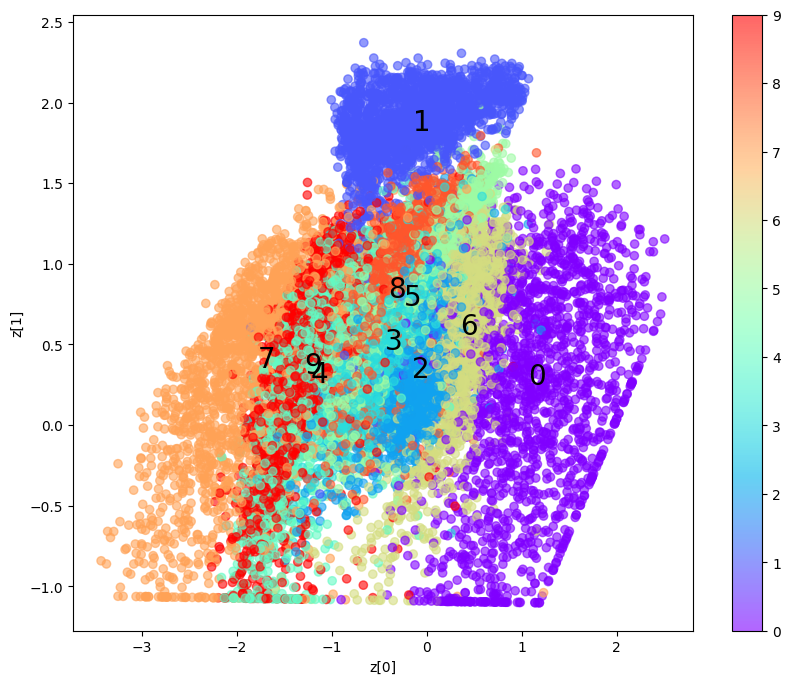

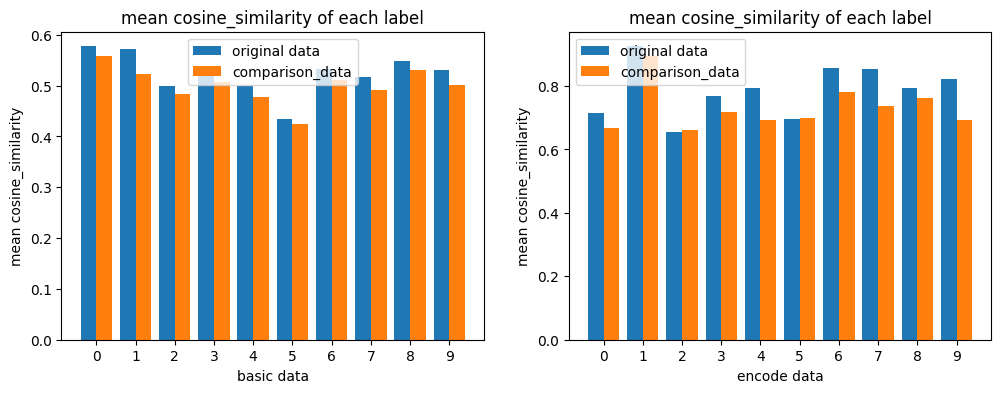

In [27]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [28]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2021'

In [29]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
